# FIT5196 Assessment 2 Task1
#### Student Name:  Maryam Mahmoodi
#### Student ID:        


Version: 1.0

Environment: Python 3.8.5 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* pandas 
* re 
* numpy
* mpl
* pylab
* math
* statsmodels.api
* sklearn.linear_model
* datetime




In [1]:
from platform import python_version

print(python_version())

3.8.5


## Import libraries 

In [2]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd

# REGEX library to match strings
import re

# Mainly mathematical libraries to deal with stanstiscal modeling as well as maths
import numpy as np
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# datetime lib to deal with open and close date data
from datetime import datetime

# Sequence matcher is used to cleanse categorical data and tries to find duplicate rows which are very similar
# but distinguished mainly due to human error (e.g. typo)
from difflib import SequenceMatcher


# Better design plottings
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Import dataframe
df = pd.read_csv("dataset1_with_error.csv")

# Set ID in the index
#df.set_index(df.Id, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            55169 non-null  int64 
 1   Title         55169 non-null  object
 2   Location      55169 non-null  object
 3   Company       51320 non-null  object
 4   ContractType  33493 non-null  object
 5   ContractTime  47047 non-null  object
 6   Category      55169 non-null  object
 7   Salary        53584 non-null  object
 8   OpenDate      55169 non-null  object
 9   CloseDate     55169 non-null  object
 10  Source        55169 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


In [4]:
df = df.fillna('non-specified')

In [5]:
df.describe(include =['O'])

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
count,55169,55169,55169,55169,55169,55169,55169,55169,55169,55169
unique,55166,489,9065,5,5,8,3758,2194,2418,106
top,Senior Financial Advisor,UK,non-specified,non-specified,permanent,IT Jobs,35000,20120415T150000,20131208T000000,totaljobs.com
freq,2,8397,3849,21676,33637,14344,1865,45,45,10102


### Observations

    * The company and contract type columns have so many non specified data.
    * Contract type and contract time, each has 5 unique values which does not sound right.
    * The majority of job titles are unique.
    * Open and close dates are in an string format.

## Task 1. Auditing and cleansing the loaded data

### Contract Time

In [6]:
# Audit uniqueness
df['ContractTime'].unique()

array(['permanent', '-', 'contract', 'non-specified', ' '], dtype=object)

In [7]:
# Converting not-given values to 'non-specified' for the integrity of data
df['ContractTime'] = df['ContractTime'].replace({'-': 'non-specified',' ':'non-specified'},inplace =False)

In [8]:
# The column is cleaned in terms of dat uniqueness
df['ContractTime'].unique()

array(['permanent', 'non-specified', 'contract'], dtype=object)

### Contract Type

  - Audit data similar to previous column

In [9]:
df['ContractType'].unique()

array(['non-specified', '-', ' ', 'full_time', 'part_time'], dtype=object)

In [10]:
# Converting not-given values to 'non-specified' for the integrity of data
df['ContractType'] = df['ContractType'].replace({'-': 'non-specified',' ':'non-specified'},inplace =False)

In [11]:
# The column is cleaned in terms of dat uniqueness
df['ContractType'].unique()

array(['non-specified', 'full_time', 'part_time'], dtype=object)

## Dealing with Salary data

    - Now that we have cleared Contract Type and Contract Time columns, I can deal with Salary column and hopefully, I will cleanse salary and impute potential missing salaries with the 'mean' of similar contract type and times. 
### What are the issues?

   - There are a variety of inconsistencies in data.
   - The data format is String which needs to be converted to Float.
   - There are <font color="blue"> 1585 </font> number of missing data.
   - A large number of data are not provided and '-' is inserted.
   - In several rows, the entry has produced by the joint of two salary data. They need to be split.hey need to be split.

### Solution:
    1. Remove extra words, strings, and space from numbers by running the normalization function.
```python
        x = re.sub(r'([\W\s]|_)', '', x)
        x = re.sub(r'([a-zA-Z]+)', '', x)
        x = re.sub( '\s+', '', x).strip()
```
    2. Split potential attachments between two entries.
        a. Split 10-digits salaries to 2 set of 5-digits. Remove the second half and keep them in a list
        b. Add the second 5-digits to their coresponding Id's

``` python
        x = x[0:6] is added to the function cleanNumeric
```
    3. Remove null and not-given records to be able to run numerical analysis.
    4. Convert strings into Float
    
##### After this stage, I'm going to calculate the average salary of the whole dataset
    1- Create a temporary dataframe
    2- Change the data type to float
    3- remove outliers
    4- find Average salary per each contract type and time

In [12]:
# Function to cleanse numeric dataframes
def cleanNumeric(x):
    if pd.isnull(x):
        return x
    if x == 'non-specified':
        return x
    else:
        x = re.sub(r'([\W\s]|_|-)', '', x).strip()
        x = re.sub(r'([a-zA-Z]+)', '', x).strip()
        x = re.sub( '\s+', '', x).strip()
        x = x[0:6]  #this step is added after running the code for the first time. Because
                    # There is a bunch of salaries above 1 million.
                    # Looking into them, it's clear that each entry is a concat of 2 entries which need to be split
        return x
    if x == '':
        x = 'non-specified'
        return x
    else:
        return x

In [13]:
# Function to normalise temporary numeric datafarams

def numeric_var(input):
    c = df[input]
    print(f"The stats for the column >>{input} and {input}Normalized << includes:")
    print (len(set(c)), f"different groups in the current {input} data set")
    df[f'{input}Normalized'] = c.apply(lambda y: cleanNumeric(y))
    print (len(set(df[f'{input}Normalized'])), f"different groups after normalization in {input}Normalized dataset")

In [14]:
# Cleanse salary in Temp salary dataframe
numeric_var('Salary')

The stats for the column >>Salary and SalaryNormalized << includes:
3758 different groups in the current Salary data set
3569 different groups after normalization in SalaryNormalized dataset


In [15]:
emptySalDeal = df[(df['SalaryNormalized'] == '')]
nullSalDeal = df[(df['SalaryNormalized'].isnull())]
nonspecSalDeal = df[(df['SalaryNormalized'] == 'non-specified')]

print(f"There are {emptySalDeal.Id.count()} empty, {nonspecSalDeal.Id.count()} non-specified and {nullSalDeal.Id.count()} null data in Salary")

There are 373 empty, 1585 non-specified and 0 null data in Salary


In [16]:
tempSal = df[(df['SalaryNormalized'] != 'non-specified') & (df['SalaryNormalized'] != '')]
print(f"There are {len(tempSal)} number of Normilised Salry in Salary column which can be used for mean and median calculations")

There are 53211 number of Normilised Salry in Salary column which can be used for mean and median calculations


### Calculate the average salary of dataset

In [17]:
s = tempSal.SalaryNormalized.astype(float)

In [18]:
tempSal['normedSalary'] = s

<ipython-input-18-bee7c3730804>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempSal['normedSalary'] = s


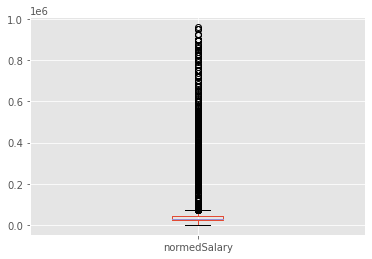

In [19]:
bp = tempSal.boxplot(column = 'normedSalary')

#### Let the box plot tell:
##### Out of 53211 number of normilised salary entries in the dataset, there are a huge number of outliers in the Salary data. Looking at the data, it is obvious that the outliers are caused by the following reasons:
   
    * Various rows in Salary are much higher than upper control limit line.
    * Various rows in Salary are much lower than lower control limit line.

In [20]:
# There are few outlier for which the value is not provided which I'll remove them for maan calculations
salaryOutlier = tempSal[(tempSal.normedSalary < 1)]
salaryOutlier.normedSalary.count()

773

In [21]:
tempSal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53211 entries, 0 to 55168
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                53211 non-null  int64  
 1   Title             53211 non-null  object 
 2   Location          53211 non-null  object 
 3   Company           53211 non-null  object 
 4   ContractType      53211 non-null  object 
 5   ContractTime      53211 non-null  object 
 6   Category          53211 non-null  object 
 7   Salary            53211 non-null  object 
 8   OpenDate          53211 non-null  object 
 9   CloseDate         53211 non-null  object 
 10  Source            53211 non-null  object 
 11  SalaryNormalized  53211 non-null  object 
 12  normedSalary      53211 non-null  float64
dtypes: float64(1), int64(1), object(11)
memory usage: 5.7+ MB


In [22]:
# I added x = x[0:6] to the function cleanNumeric
# so that, the result of the following list is EMPTY -> which means that there's no Salary above 1 million
salaryOutlier2 = tempSal[((tempSal.normedSalary > 80000) & (tempSal.ContractType == 'non-specified'))
                         |
                         ((tempSal.ContractType == 'non-specified')& (tempSal.normedSalary < 20000))]
print(len(salaryOutlier2))
list(salaryOutlier2.normedSalary)

7637


[16000.0,
 18000.0,
 17280.0,
 16000.0,
 18000.0,
 19000.0,
 15500.0,
 17000.0,
 12646.0,
 15000.0,
 17500.0,
 16000.0,
 15000.0,
 18000.0,
 15500.0,
 14000.0,
 14500.0,
 18000.0,
 17000.0,
 16500.0,
 14000.0,
 15500.0,
 17000.0,
 16500.0,
 16000.0,
 14880.0,
 13440.0,
 13440.0,
 18720.0,
 13440.0,
 15446.0,
 15446.0,
 11673.0,
 16320.0,
 13392.0,
 19200.0,
 19056.0,
 11884.0,
 14500.0,
 19735.0,
 19266.0,
 17280.0,
 15360.0,
 15168.0,
 16500.0,
 14586.0,
 18500.0,
 13864.0,
 18320.0,
 16200.0,
 15360.0,
 15360.0,
 15000.0,
 261312.0,
 19500.0,
 16000.0,
 13500.0,
 16000.0,
 18000.0,
 17000.0,
 14500.0,
 16500.0,
 15000.0,
 17000.0,
 13500.0,
 18000.0,
 12500.0,
 17500.0,
 14000.0,
 13000.0,
 16500.0,
 12500.0,
 17000.0,
 16500.0,
 19512.0,
 16000.0,
 15600.0,
 16000.0,
 17234.0,
 13512.0,
 19200.0,
 16500.0,
 15500.0,
 18600.0,
 14750.0,
 13516.0,
 14476.0,
 18720.0,
 16000.0,
 11520.0,
 16000.0,
 17650.0,
 14676.0,
 16000.0,
 17000.0,
 17760.0,
 17000.0,
 18000.0,
 18500.0,
 16000.0,

In [23]:
tempSal = tempSal[((tempSal.normedSalary < 68000) & (tempSal.normedSalary > 20000))]

In [24]:
# Inner join categorical and Salary dataframes to remove the non-sense salary entries
df = df.merge(tempSal, how='inner',left_on='Id', right_on='Id')

In [25]:
df.describe()

,Id,normedSalary
count,4.016200e+04,40162.000000
mean,6.888052e+07,35890.056421
std,4.213380e+06,11182.820614
min,1.261263e+07,20016.000000
25%,6.835615e+07,27000.000000
50%,6.922156e+07,33500.000000
75%,7.127683e+07,42500.000000
max,7.270524e+07,67800.000000


In [26]:
df = df[["Id",
"Title_x",
"Location_x",
"Company_x",
"ContractType_x",
"ContractTime_x",
"Category_x",
"OpenDate_x",
"CloseDate_x",
"Source_x",
"normedSalary"]]

In [27]:
df["normedSalary"].median()

33500.0

In [28]:
df["normedSalary"] = df["normedSalary"].round()

In [29]:
df["normedSalary"].fillna(df.groupby("ContractType_x")["normedSalary"].transform("mean"), inplace=True)

In [30]:
df.describe()

,Id,normedSalary
count,4.016200e+04,40162.000000
mean,6.888052e+07,35890.056421
std,4.213380e+06,11182.820614
min,1.261263e+07,20016.000000
25%,6.835615e+07,27000.000000
50%,6.922156e+07,33500.000000
75%,7.127683e+07,42500.000000
max,7.270524e+07,67800.000000


In [31]:
df["normedSalary"].median()

33500.0

array([[<AxesSubplot:title={'center':'contract'}>,
        <AxesSubplot:title={'center':'non-specified'}>],
       [<AxesSubplot:title={'center':'permanent'}>, <AxesSubplot:>]],
      dtype=object)

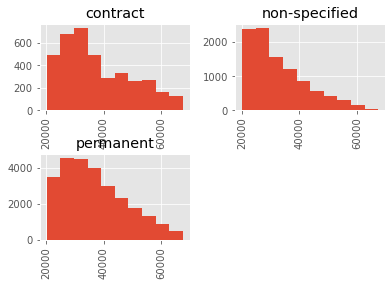

In [32]:
df.hist(by="ContractTime_x", column="normedSalary")

array([[<AxesSubplot:title={'center':'full_time'}>,
        <AxesSubplot:title={'center':'non-specified'}>],
       [<AxesSubplot:title={'center':'part_time'}>, <AxesSubplot:>]],
      dtype=object)

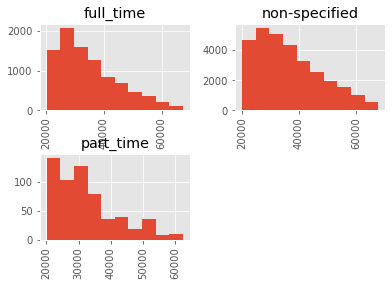

In [33]:
df.hist(by="ContractType_x", column="normedSalary")

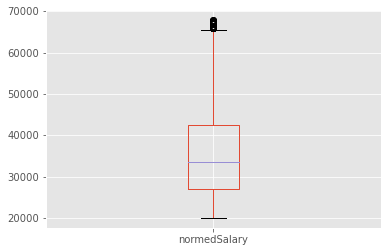

In [34]:
bp = df.boxplot(column='normedSalary')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40162 entries, 0 to 40161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              40162 non-null  int64  
 1   Title_x         40162 non-null  object 
 2   Location_x      40162 non-null  object 
 3   Company_x       40162 non-null  object 
 4   ContractType_x  40162 non-null  object 
 5   ContractTime_x  40162 non-null  object 
 6   Category_x      40162 non-null  object 
 7   OpenDate_x      40162 non-null  object 
 8   CloseDate_x     40162 non-null  object 
 9   Source_x        40162 non-null  object 
 10  normedSalary    40162 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 3.7+ MB


### Categorical Cleansing Functions
    - At this stage, I am going to deal with the categorical data. Categorical data are against the numerical which can be quantified. 
    
    - The following are common functions which are used during the assessment to perform required activities according to the observations.

In [36]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [37]:
from collections import Counter
    
# find the high frequency location to low frequency location
def match_highfreq_To_lowfreq(data, min_threshold, max_threshold):
   # check low frequency Title names
    lowfreq_data_list = [k for k,v in Counter(data).items() if v<=5]
    print ("Number of lowfreq_data", len(lowfreq_data_list))
    highfreq_data_list = list(set(data[~(data.isnull())]).difference(lowfreq_data_list))
    print ("Number of highfreq_data", len(highfreq_data_list))
    # the printed data tells that probably not many companies posted more than 5 jobs in those years.


    match_data={}
    for lowfreq_data in lowfreq_data_list:
        for highfreq_data in highfreq_data_list:
            ratio = similar(lowfreq_data.upper(), highfreq_data.upper())
            if ratio >= min_threshold and ratio <= max_threshold:
                match_data[lowfreq_data] = highfreq_data
                print(lowfreq_data, ":", highfreq_data, ratio)
    return match_data

In [38]:
# the following function, when called, will clean and normalize categorical columns
def removeEndSpecialChar(x):
    if pd.isnull(x):
        return x
    else:
        # normalize to upper case letters
        x = x.upper()
        # remove special character at the end
        x = re.sub(r"\W+$", " ", x)
        x = re.sub(r"\*+k", " ", x)
        # replace LIMITED with LTD
        x = x.replace("LIMITED", "LTD")
        # replace " AND " with " & " for processing 
        x = x.replace(" & ", " AND ")
        # remove all special characters except space and dot
        x = re.sub(r'([^\w\s\.]|_)', '', x)
        # change " AND " back to " & " 
        x = x.replace(" AND ", " & ")
        # replace multiple spaces with a single space, also trim spaces on both side
        x = re.sub( '\s+', ' ', x).strip()
        return x

In [39]:
def which_categorical_var(input):
    c = df[input]
    print(f"The stats for the column >>{input} and {input}Normalized << includes:")
    print (len(set(c)), f"different groups in the current {input} data set")
    df[f'{input}Normalized'] = c.apply(lambda y: removeEndSpecialChar(y))
    print (len(set(df[f'{input}Normalized'])), f"different groups after normalization in {input}Normalized dataset")

In [40]:
def replacefunc(x):
    if pd.isnull(x):
        return x
    else:
        x = re.sub("", PermSalary, x)
        return x

### Contract Type

In [41]:
df.ContractType_x.value_counts()

non-specified    30491
full_time         9073
part_time          598
Name: ContractType_x, dtype: int64

In [42]:
which_categorical_var('ContractType_x')

The stats for the column >>ContractType_x and ContractType_xNormalized << includes:
3 different groups in the current ContractType_x data set
3 different groups after normalization in ContractType_xNormalized dataset


In [43]:
df.ContractType_xNormalized.value_counts()

NONSPECIFIED    30491
FULLTIME         9073
PARTTIME          598
Name: ContractType_xNormalized, dtype: int64

### Contract Time

In [44]:
df.ContractTime_x.value_counts()

permanent        26403
non-specified     9930
contract          3829
Name: ContractTime_x, dtype: int64

In [45]:
which_categorical_var('ContractTime_x')

The stats for the column >>ContractTime_x and ContractTime_xNormalized << includes:
3 different groups in the current ContractTime_x data set
3 different groups after normalization in ContractTime_xNormalized dataset


In [46]:
df.ContractTime_xNormalized.value_counts()

PERMANENT       26403
NONSPECIFIED     9930
CONTRACT         3829
Name: ContractTime_xNormalized, dtype: int64

### Running a linear regression to find out relationship between different columns (hypothesis testing)
    - The intention is to impute categorical data.
    
    - In other words, the graphs in previous section bring about the doubt that we can impute 'Permanent' contract for all the 'Full time' contract types. Based on this assumption, I'm going to run a linear regression to test my hypothesis.
    
    - In order to run the linear regresion, I have to take the following steps:
        1. Map string values to responsive float digits so that I can run mathematical linear regression. 
        2. Remove non-specified rows to run the regression only among given and clean data
        3. Build the regression model and draw the result in a graph
    
    - As a result, I use the normalised contract type and time data to create a temporary list and data frame.

In [47]:
conTypeList = list(df.ContractType_xNormalized)
conTimeList = list(df.ContractTime_xNormalized)

In [48]:
tempListType =[]
for i in conTypeList:
    if i is not None:
        tempListType.append(i)

In [49]:
tempListTime =[]
for i in conTimeList:
    if i is not None:
        tempListTime.append(i)

In [50]:
numerator_ConType = []
for i in tempListType:
    if i:
        if i == 'FULLTIME':
            i = 2
        elif i == 'PARTTIME':
            i = 1
        else:
            i = 0
    numerator_ConType.append(i)
ncType = numerator_ConType
conTypeS = pd.Series(data=ncType, index = df.index)

In [51]:
numerator_ConTime = []
for i in tempListTime:
    if i:
        if i == 'PERMANENT':
            i = 2
        elif i == 'CONTRACT':
            i = 1
        else:
            i = 0
    numerator_ConTime.append(i)
ncTime = numerator_ConTime
conTimeS = pd.Series(data=ncTime, index = df.index)

In [52]:
df['conTypeS'] = conTypeS

In [53]:
df['conTimeS'] = conTimeS

In [54]:
df['conTypeS'] = pd.to_numeric(df['conTypeS'], downcast='float')

In [55]:
df['conTimeS'] = pd.to_numeric(df['conTimeS'], downcast='float')

In [56]:
filtered_data1 = df[df.conTypeS > 0]

In [57]:
filtered_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 72 to 40157
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        9671 non-null   int64  
 1   Title_x                   9671 non-null   object 
 2   Location_x                9671 non-null   object 
 3   Company_x                 9671 non-null   object 
 4   ContractType_x            9671 non-null   object 
 5   ContractTime_x            9671 non-null   object 
 6   Category_x                9671 non-null   object 
 7   OpenDate_x                9671 non-null   object 
 8   CloseDate_x               9671 non-null   object 
 9   Source_x                  9671 non-null   object 
 10  normedSalary              9671 non-null   float64
 11  ContractType_xNormalized  9671 non-null   object 
 12  ContractTime_xNormalized  9671 non-null   object 
 13  conTypeS                  9671 non-null   float32
 14  conTim

In [58]:
filtered_data1.conTypeS.value_counts()

2.0    9073
1.0     598
Name: conTypeS, dtype: int64

In [59]:
filtered_data2 = filtered_data1[filtered_data1.conTimeS > 0]

In [60]:
x_y = np.array(filtered_data2)

x, y = x_y[:,-1], x_y[:,-2]

# Reshaping
x, y = x.reshape(-1,1), y.reshape(-1, 1)

# Linear Regression Object 
lin_regression = LinearRegression()

# Fitting linear model to the data
lin_regression.fit(x,y)

# Get slope of fitted line
m = lin_regression.coef_

# Get y-Intercept of the Line
b = lin_regression.intercept_

# Get Predictions for original x values
# you can also get predictions for new data
predictions = lin_regression.predict(x)

# following slope intercept form 
print(f"formula: y = {m}x + {b}") 
print(f"From {m} as the slope in regression formula, we can easily infer that there is very minimum relationship between the Type and Time of contracts") 

formula: y = [[0.09322138]]x + [1.80288252]
From [[0.09322138]] as the slope in regression formula, we can easily infer that there is very minimum relationship between the Type and Time of contracts


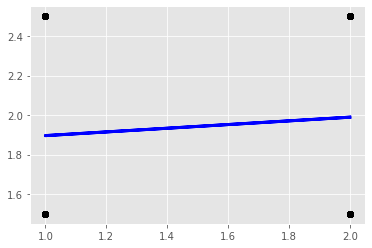

In [61]:
# Plot the Original Model (Black) and Predictions (Blue)
plt.scatter(x, y+.5,  color='black')
plt.plot(x, predictions, color='blue',linewidth=3)
plt.show()

  - As a linear regression graph clearly tells, there is no way we can assume (and eventually, impute) any conract time data based on their contract type. As a result, my hypothesis is rejected.

In [62]:
# Converting not-given values to 'non-specified' for the integrity of data
df['ContractTime_xNormalized'] = df['ContractTime_xNormalized'].replace({'NONSPECIFIED':'NON-SPECIFIED'},inplace=False)

In [63]:
df['ContractTime_xNormalized'].value_counts()

PERMANENT        26403
NON-SPECIFIED     9930
CONTRACT          3829
Name: ContractTime_xNormalized, dtype: int64

In [64]:
df['ContractType_xNormalized'] = df['ContractType_xNormalized'].replace({'NONSPECIFIED':'NON-SPECIFIED'},inplace=False)

In [65]:
df['ContractType_xNormalized'].value_counts()

NON-SPECIFIED    30491
FULLTIME          9073
PARTTIME           598
Name: ContractType_xNormalized, dtype: int64

### Source

In [66]:
which_categorical_var('Source_x')

The stats for the column >>Source_x and Source_xNormalized << includes:
96 different groups in the current Source_x data set
96 different groups after normalization in Source_xNormalized dataset


In [67]:
match_data=match_highfreq_To_lowfreq(df.Source_xNormalized, 0.95, 1)

Number of lowfreq_data 7
Number of highfreq_data 89


In [68]:
# replace lower frequent with higher frequent
df['Source_resovle_similar'] = df.Source_xNormalized.replace(match_data)

In [69]:
match_highfreq_To_lowfreq(df.Source_xNormalized, 0.95, 1)

Number of lowfreq_data 7
Number of highfreq_data 89


{}

In [70]:
newSource = []
for i in df['Source_resovle_similar']:
    if i == 'non-specified':
        i = i
    elif re.findall(r'(.*\.\w+)$',i):
        i = i
    else:
        i = f"Company name is '{i}' but website address is not provided."
    newSource.append(i)
newSource = newSource
SourceS = pd.Series(data=newSource, index = df.index)
df['newSource'] = SourceS

In [71]:
print(f"There are {len(df[df['newSource'].str.contains('website')])} source entries for which the company name is provided but website address is not available.\nThose items are marked in dataframe")

There are 3083 source entries for which the company name is provided but website address is not available.
Those items are marked in dataframe


### Title

In [72]:
which_categorical_var('Title_x')

The stats for the column >>Title_x and Title_xNormalized << includes:
40160 different groups in the current Title_x data set
40142 different groups after normalization in Title_xNormalized dataset


In [73]:
(df.Title_x.value_counts())

Pensions Administrators (Temporary/Contract)                    2
Senior Financial Advisor                                        2
Senior / Lead Software Engineer (Visual Studio VBNET)           1
USED CAR SALES EXECUTIVE, BIRMINGHAM                            1
Reception Manager/Front of House Manager                        1
                                                               ..
Pub Manager – Fresh & Seasonal Menus – Nr Basingstoke  ****k    1
C Net Software Developer, Peterborough ****k                    1
Desktop/ Second Line support/ Field Service engineer            1
Engineer Project ****                                           1
Aerodynamicist                                                  1
Name: Title_x, Length: 40160, dtype: int64

In [74]:
match_data=match_highfreq_To_lowfreq(df.Title_xNormalized, 0.95, 1)

Number of lowfreq_data 40142
Number of highfreq_data 0


In [75]:
df['Title_resovle_similar'] = df.Title_xNormalized.replace(match_data)

    - There is no further change can be done to Title column.

### Location

In [76]:
which_categorical_var('Location_x')

The stats for the column >>Location_x and Location_xNormalized << includes:
489 different groups in the current Location_x data set
484 different groups after normalization in Location_xNormalized dataset


    - Location column looks good with 484 different groups and 489 high freq data after normalisation.

### Company

In [77]:
which_categorical_var('Company_x')

The stats for the column >>Company_x and Company_xNormalized << includes:
7090 different groups in the current Company_x data set
6669 different groups after normalization in Company_xNormalized dataset


In [78]:
match_data=match_highfreq_To_lowfreq(df.Company_xNormalized, 0.95, 1)

Number of lowfreq_data 5190
Number of highfreq_data 1479
SOLUTION RECRUITMENT : SOLUTIONS RECRUITMENT 0.975609756097561
SIGMAR RECRUITMENT : SIGMA RECRUITMENT 0.9714285714285714
HOLT RECRUITMENT : HOT RECRUITMENT 0.967741935483871
RANDSTAD FINANCIAL PROFESSIONAL : RANDSTAD FINANCIAL & PROFESSIONAL 0.96875
HW ASSOCIATES RECRUITMENT LTD : HWA ASSOCIATES RECRUITMENT LTD 0.9830508474576272
BADENOCHCLARK : BADENOCH CLARK 0.9629629629629629
ADDITIONAL RESOURCE : ADDITIONAL RESOURCES 0.9743589743589743
BERKELEY SCOTT PUBS BARS RESTAURANTS : BERKELEY SCOTT PUBS BARS & RESTAURANTS 0.972972972972973
EASY WEB RECRUITMENT : EASYWEB RECRUITMENT 0.9743589743589743
PROSPER RECRUITMENT : PROSPERO RECRUITMENT 0.9743589743589743
COYLE PERSONNEL PLC : COYLES PERSONNEL PLC 0.9743589743589743
JFL SEARCH & SELECTION : JFL SEARCH SELECTION 0.9523809523809523
RECRUITMENT REVOLUTION.COM LTD : RECRUITMENTREVOLUTION.COM LTD 0.9830508474576272
EDSTAFF LTD : EDUSTAFF LTD 0.9565217391304348
SOLUTIONS 4 RECRUITMENT 

In [79]:
df['Company_resovle_similar'] = df.Company_xNormalized.replace(match_data)

In [80]:
match_highfreq_To_lowfreq(df.Company_resovle_similar, 0.95, 1)

Number of lowfreq_data 5150
Number of highfreq_data 1479


{}

### Open and Close Dates

In [81]:
# Create a function to manage day suffix for 1st, 2nd, and 3rd and rest (th) day of each month
def suffix(d):
    return 'th' if 11<=d<=13 else {1:'st',2:'nd',3:'rd'}.get(d%10, 'th')

def custom_strftime(format, t):
    return t.strftime(format).replace('{S}', str(t.day) + suffix(t.day))

In [82]:
# Following lines will match the date time based on the assessment's requirements

formatted_OpenDate=[]
for i in df["OpenDate_x"]:
    try:
        new_open_date = custom_strftime('%-I%p, {S} %B %Y', datetime.strptime(i, '%Y%m%dT%H%M%S'))
    except ValueError:
        new_open_date = 0
    formatted_OpenDate.append(new_open_date)
formatted_OpenDate = formatted_OpenDate
openDateS = pd.Series(data=formatted_OpenDate, index = df.index)
df['newOpenDate'] = openDateS

In [83]:
# Following lines will match the date time based on the assessment's requirements

formatted_CloseDate=[]
for i in df["CloseDate_x"]:
    try:
        new_close_date = custom_strftime('%-I%p, {S} %B %Y', datetime.strptime(i, '%Y%m%dT%H%M%S'))
    except ValueError:
        new_close_date = 0
    formatted_CloseDate.append(new_close_date)
formatted_CloseDate = formatted_CloseDate
closeDateS = pd.Series(data=formatted_CloseDate, index = df.index)
df['newCloseDate'] = closeDateS

## Saving data
Save the cleaned data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40162 entries, 0 to 40161
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        40162 non-null  int64  
 1   Title_x                   40162 non-null  object 
 2   Location_x                40162 non-null  object 
 3   Company_x                 40162 non-null  object 
 4   ContractType_x            40162 non-null  object 
 5   ContractTime_x            40162 non-null  object 
 6   Category_x                40162 non-null  object 
 7   OpenDate_x                40162 non-null  object 
 8   CloseDate_x               40162 non-null  object 
 9   Source_x                  40162 non-null  object 
 10  normedSalary              40162 non-null  float64
 11  ContractType_xNormalized  40162 non-null  object 
 12  ContractTime_xNormalized  40162 non-null  object 
 13  conTypeS                  40162 non-null  float32
 14  conTim

In [85]:
df = df.fillna('NON-SPECIFIED')

In [86]:
df.rename(columns = {'Id':'Id',
'Title_resovle_similar':'Title',
'Location_xNormalized':'Location',
'Company_resovle_similar':'Company',
'ContractType_xNormalized':'ContractType',
'ContractTime_xNormalized':'ContractTime',
'Category_x':'Category',
'normedSalary':'Salary',
'newOpenDate':'OpenDate',
'newCloseDate':'CloseDate',
'newSource':'Source'}, inplace = True)

In [87]:
final_df = df[['Id',
'Title',
'Location',
'Company',
'ContractType',
'ContractTime',
'Category',
'Salary',
'OpenDate',
'CloseDate',
'Source']]

In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40162 entries, 0 to 40161
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            40162 non-null  int64  
 1   Title         40162 non-null  object 
 2   Location      40162 non-null  object 
 3   Company       40162 non-null  object 
 4   ContractType  40162 non-null  object 
 5   ContractTime  40162 non-null  object 
 6   Category      40162 non-null  object 
 7   Salary        40162 non-null  float64
 8   OpenDate      40162 non-null  object 
 9   CloseDate     40162 non-null  object 
 10  Source        40162 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.7+ MB


In [89]:
final_df.to_csv(r'dataset1_solution.csv', index = False)

## Summary
Give a short summary and anything you would like to talk about assessment 2 part 1 here.

  - A huge number of data was missing. In certain cases, I was able to impute based on similar dara category in other rows. For example, having contract type and contract time cleansed, I was able to calculate 'salary' mean accordingly and as a result, I did impute missing rows. 
    - However, there were numerous missing rows in Contract type and time. Intuition called that there might be a correlation between the two columns. In order to test the hypothesis, I did run a linear regression which resulted in 0.09 slope. As a result, my hypothesis was rejected. Therefore, missing contract type and times were labeled as 'non-specified'.
    - Furthermore, drawing the boxplot illustrated a huge number of outliers which were removed from the dataset.
    - As the final outcome, we have a cleaned dataset stored in 'dataset1_solution.csv' which includes 11 columns and 40162 rows of reliable data.
    - During the wrangling process, few temporary dataframes and series were also generated.

In [90]:
final_df.describe(include=['O'])

,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,Source
count,40162,40162,40162,40162,40162,40162,40162,40162,40162
unique,40142,484,6629,3,3,8,2194,2409,96
top,SENIOR ELECTRICAL & CONTROLS ENGINEER,UK,NONSPECIFIED,NON-SPECIFIED,PERMANENT,IT Jobs,"3PM, 15th April 2012","12AM, 8th December 2013",TOTALJOBS.COM
freq,2,6116,2717,30491,26403,11146,36,35,7520
